In [1]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Conv1D, MaxPooling1D
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-06,39.599998,41.549999,39.500000,40.619999,40.619999,62279000
1,2015-04-07,40.501999,41.012001,40.228001,40.650002,40.650002,21739500
2,2015-04-08,41.639999,42.180000,41.174000,41.534000,41.534000,31515500
3,2015-04-09,41.686001,42.074001,41.223999,42.018002,42.018002,19001000
4,2015-04-10,41.970001,42.330002,41.799999,42.180000,42.180000,20338500
...,...,...,...,...,...,...,...
1505,2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400
1506,2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000
1507,2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995,39432400
1508,2021-03-31,646.619995,672.000000,641.109985,667.929993,667.929993,33337300


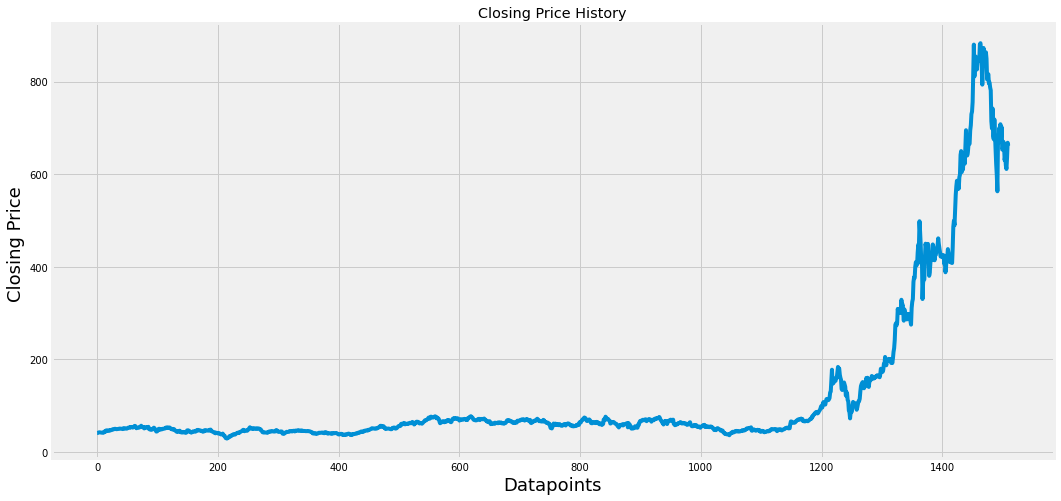

In [3]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Datapoints', fontsize=18)
plt.ylabel('Closing Price ', fontsize=18)
plt.show()

In [4]:
#creating a new dataframe with only the "Close column"
data = df.filter(['Close'])

In [69]:
#converting the dataframe to a numpy array
ds = data.values

In [70]:
#getting the number of rows to train the model (80% training ,20% testing)
train_len = math.ceil(len(ds)*.8)

train_len

1208

In [71]:
#Scaling the data (normalization)
scaler =  MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(ds)

scaled

array([[0.01391223],
       [0.01394735],
       [0.01498205],
       ...,
       [0.7103432 ],
       [0.74816116],
       [0.74092765]])

In [72]:
#creating the scaled training dataset
traind = scaled[0:train_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(traind)):
    x_train.append(traind[i-60:i, 0])
    y_train.append(traind[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

[array([0.01391223, 0.01394735, 0.01498205, 0.01554856, 0.01573817,
       0.01547599, 0.01493289, 0.0150195 , 0.01475497, 0.01477604,
       0.01442022, 0.01538937, 0.01773734, 0.0175407 , 0.0175009 ,
       0.02057222, 0.02032174, 0.02078291, 0.0192847 , 0.01928002,
       0.02032876, 0.02089995, 0.02031003, 0.02180122, 0.02175674,
       0.02243093, 0.02365993, 0.02329474, 0.02351011, 0.02461972,
       0.02459865, 0.02422175, 0.02356863, 0.02386593, 0.02435987,
       0.02429666, 0.02428964, 0.0252307 , 0.02507854, 0.02476251,
       0.02450501, 0.02465483, 0.02393616, 0.02468994, 0.02636372,
       0.02629583, 0.02505513, 0.02522134, 0.02505279, 0.02498022,
       0.02562164, 0.02732819, 0.02767464, 0.02781978, 0.02718305,
       0.02902771, 0.02844248, 0.0292899 , 0.02889194, 0.02770508])]
[0.029165828042826192]

[array([0.01391223, 0.01394735, 0.01498205, 0.01554856, 0.01573817,
       0.01547599, 0.01493289, 0.0150195 , 0.01475497, 0.01477604,
       0.01442022, 0.01538937, 0.0

In [73]:
#converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping the data (CNN expects 2 dimentionals)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1148, 60, 1)

In [86]:
#building the CNN model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape = (x_train.shape[1], 1)))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))

In [87]:
#compiling the model 
model.compile(optimizer='adam', loss='mean_squared_error')

#training the model
hist = model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
1148/1148 [==============================] - 4s 3ms/step - loss: 9.8630e-05
Epoch 2/20
1148/1148 [==============================] - 4s 3ms/step - loss: 3.2504e-05
Epoch 3/20
1148/1148 [==============================] - 4s 3ms/step - loss: 2.2977e-05
Epoch 4/20
1148/1148 [==============================] - 4s 3ms/step - loss: 2.1527e-05
Epoch 5/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.6043e-05
Epoch 6/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.5181e-05
Epoch 7/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.4172e-05
Epoch 8/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.6651e-05
Epoch 9/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.7047e-05
Epoch 10/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.2206e-05
Epoch 11/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1.1698e-05
Epoch 12/20
1148/1148 [==================

In [88]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 56, 128)           768       
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 52, 128)           82048     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 26, 128)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3328)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3329      
Total params: 86,145
Trainable params: 86,145
Non-trainable params: 0
_________________________________________________________________
None


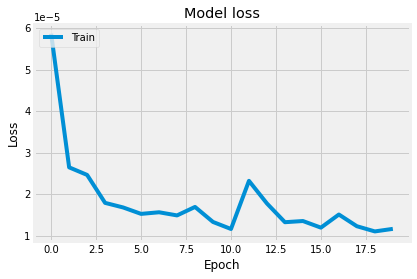

In [89]:
#showing the model loss
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [90]:
#creating the testing data set
#creating a new array containing scaled values from index 
testd = scaled[train_len - 60: , : ]
#creating the datasets x_test and y_test
x_test = []
y_test = ds[train_len:, :]
for i in range (60, len(testd)):
    x_test.append(testd[i-60:i, 0])
    
#converting the data to a numpy array
x_test = np.array(x_test)

#reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [91]:
#getting the models predicted price values
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)


In [92]:
#getting the root mean squared error (RMSE) (lower values better fit)
rmse = np.sqrt( np.mean( pred - y_test)**2)
print(rmse)

69.738738096096


In [93]:
#getting the mean absolute error (average of the forecast error values - all of them forced to be positive)
mae = mean_absolute_error(y_test, pred)
print(mae)

72.35511563668803


In [94]:
#defining MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#getting MAPE
mape = mean_absolute_percentage_error(y_test, pred)
print(mape)

14.922151300196449


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


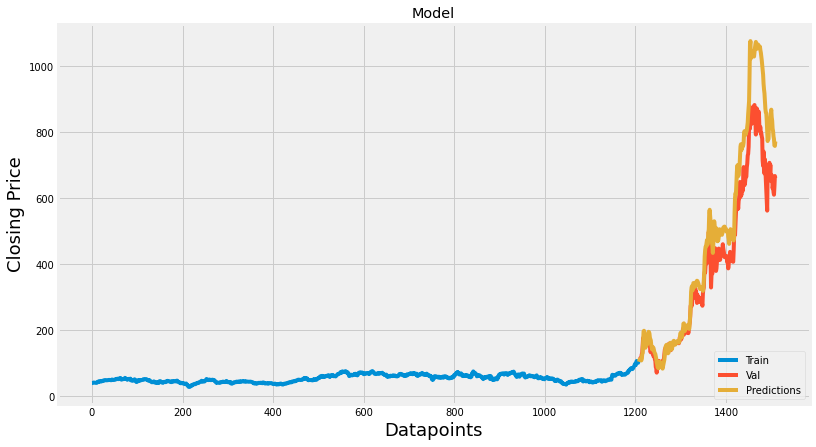

In [95]:
#plotting the data
train = data[:train_len]
val = data[train_len:]
val['Predictions'] = pred
#visualizing the data
plt.figure(figsize=(12,7))
plt.title('Model')
plt.xlabel('Datapoints', fontsize = 18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


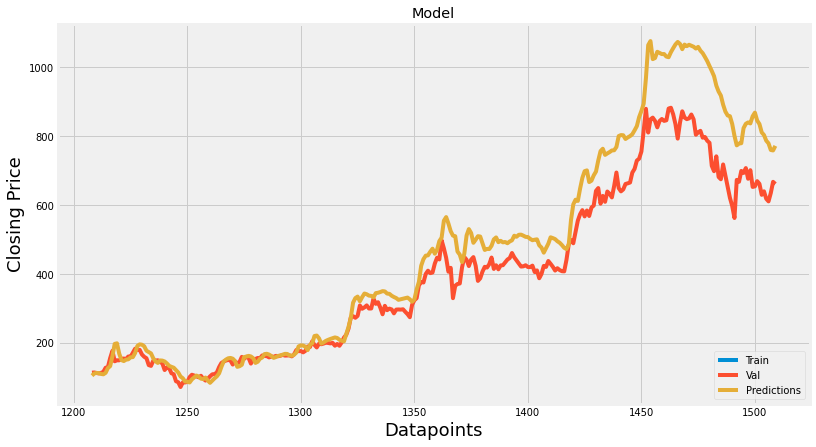

In [96]:
#plotting zoomed in
train = data[2000:train_len]
val = data[train_len:]
val['Predictions'] = pred
#visualizing the data
plt.figure(figsize=(12,7))
plt.title('Model')
plt.xlabel('Datapoints', fontsize = 18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
from sklearn.metrics import r2_score

In [97]:
r2_score(y_test,pred)

0.8143176171003002

In [98]:
#Showing the actual and predicted values
val

,Close,Predictions
1208,113.912003,105.348541
1209,114.440002,111.492676
1210,112.963997,113.110298
1211,111.603996,112.470863
1212,113.379997,110.158150
...,...,...
1505,618.710022,787.528870
1506,611.289978,779.729370
1507,635.619995,760.513428
1508,667.929993,759.129456
